## imports

In [36]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

from astropy.io import fits

## load fits

In [37]:
image_name = "data_test/flats/Cal-0002flat6.fit"

image_file = fits.open(image_name) # its an array of objects

## show object info

In [38]:
image_file.info()

Filename: data_test/flats/Cal-0002flat6.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   (4524, 3624)   int16 (rescales to uint16)   


## show headers

In [39]:
image_file[0].header

SIMPLE  =                    T                                                  
BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                 4524 /fastest changing axis                           
NAXIS2  =                 3624 /next to fastest changing axis                   
BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           
BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           
DATE-OBS= '2021-11-09T15:15:54' /YYYY-MM-DDThh:mm:ss observation start, UT      
EXPTIME =   40.000000000000000 /Exposure time in seconds                        
EXPOSURE=   40.000000000000000 /Exposure time in seconds                        
SET-TEMP=  -20.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -19.964256286621094 /CCD temperature at start of exposure in C       
XPIXSZ  =   6.00000000000000

## show image

C:\Users\ishay\AppData\Local\Temp/ipykernel_12380/913046456.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


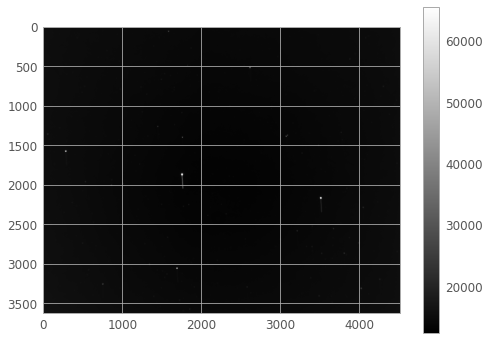

In [40]:
plt.figure()
plt.imshow(image_file[0].data, cmap='gray')
plt.colorbar()

## close file

In [41]:
image_file.close()

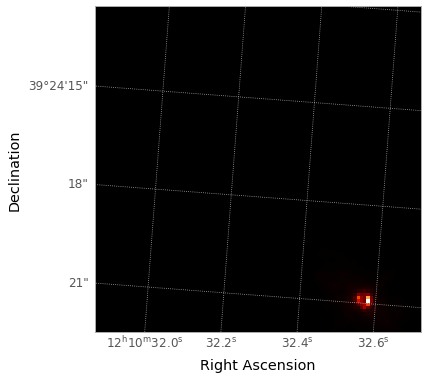

In [46]:
from astropy.wcs import WCS

# Open the FITS file and retrieve the data
# and WCS header keyword information from the
# first science extension. Save the WCS
# information into an Astropy WCS object.
with fits.open("data_test/test_photo.fits") as hdu:
    data = hdu[0].data
    wcs = WCS(hdu[0].header)
 
# Select a subsection of the image to display.
# Here we have selected a 400 x 400 pixel section
# with x = [280:680] and y = [2290:2690].
cutout = data[:, :]
 
# Create the plotting object with the WCS projection.
plt.subplot(projection=wcs)
plt.imshow(cutout)
plt.grid(color='white', ls=':', alpha=0.7)
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
 
# Save the figure.
# plt.savefig('galaxies_wcs.png')